In [22]:
#QUESTION A1
import pandas as pd
import numpy as np

#to find dimensionality of vector space:
def dimensionality(matrix):
    return matrix.shape[1]

#to find number of vectors in the vector space
def vector_number(matrix):
    return matrix.shape[0]

#to find ranf of matrix A
def find_rank(matrix):
    return np.linalg.matrix_rank(matrix)

#to find cost of each product available for sale using Pseudo-Inverse
def find_cost(A,C):
    A_pseudo_inv = np.linalg.pinv(A)
    cost = A_pseudo_inv @ C
    return cost
    
file_path = 'C:\\Users\\Bhavi\\Downloads\\Lab Session Data.xlsx'
sheet_name = 'Purchase data'

data = pd.read_excel(file_path, sheet_name=sheet_name)

A = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values  
C = data[['Payment (Rs)']].values     

print("Matrix A:")
print(A)
print("\nMatrix C:")
print(C)
print('\nthe dimensionality of the vector space:',dimensionality(A))
print('\nthe number of vectors in the vector space:',vector_number(A))
print('\nthe rank of matrix A:',find_rank(A))
print('\nthe cost of each product:',find_cost(A,C))

Matrix A:
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]

Matrix C:
[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]

the dimensionality of the vector space: 3

the number of vectors in the vector space: 10

the rank of matrix A: 3

the cost of each product: [[ 1.]
 [55.]
 [18.]]


In [24]:
#QUESTION A2

import pandas as pd
import numpy as np

#Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products 
#available with the vendor
def calculate_model_vector(A, C):
    A_pseudo_inv = np.linalg.pinv(A)
    X = A_pseudo_inv @ C
    return X
   
file_path = 'C:\\Users\\Bhavi\\Downloads\\Lab Session Data.xlsx'
sheet_name = 'Purchase data'

data = pd.read_excel(file_path, sheet_name=sheet_name)

A = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values  
C = data[['Payment (Rs)']].values     
print('\nmodel vector for predicting the cost of the products available with the vendor',calculate_model_vector(A, C))


model vector for predicting the cost of the products available with the vendor [[ 1.]
 [55.]
 [18.]]


In [26]:
#QUESTION A3

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Function to classify customers based on payment
def classify_customers(data, payment_column, threshold=200):
    data['Class'] = np.where(data[payment_column] > threshold, 'RICH', 'POOR')
    return data

# Function to train and evaluate a classifier model
def train_evaluate_classifier(data, feature_columns, class_column):
    X = data[feature_columns]
    y = data[class_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=37)
    
    # Initialize and train the logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    return accuracy, report

if __name__ == "__main__":
    # File path and sheet name
    file_path = 'C:\\Users\\Bhavi\\Downloads\\Lab Session Data.xlsx'
    sheet_name = 'Purchase data'
    
    # Load the data
    purchase_df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Define feature columns and class column
    feature_columns = ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']
    class_column = 'Class'
    
    # Classify customers as RICH or POOR
    purchase_df = classify_customers(purchase_df, 'Payment (Rs)')
    
    # Train and evaluate the classifier model
    accuracy, report = train_evaluate_classifier(purchase_df, feature_columns, class_column)
    
    # Print results
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)

Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

        POOR       0.50      1.00      0.67         1
        RICH       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



mean of price: 1560.663453815261
variance of price: 58732.365352539186
sample mean for wednesday prices: 1550.706
sample mean is lesser than population mean for wednesday prices sample
sample mean for april prices: 1698.9526315789474
sample mean is higher than population mean for april prices sample
probability of making a loss over stock: 0.4979919678714859
probability of making a profit over stock on wednesday: 0.42
conditional probability of making a profit, given that it is wednesday: 0.8433870967741935


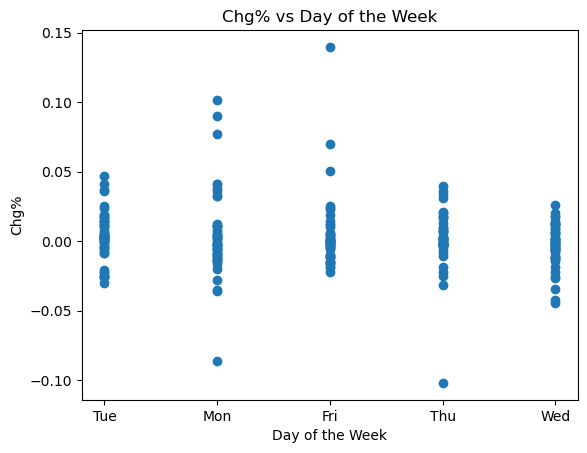

In [72]:
#QUESTION A4

import pandas as pd
import statistics
import matplotlib.pyplot as plt

#to calculate mean
def calc_mean(price):
    return statistics.mean(price)

#to calculate variance
def calc_variance(price):
    return statistics.variance(price)

#to find the sample mean for price data on wednesdays
def calc_sample_mean(prices):
    return statistics.mean(prices)

#to find the probability of making a loss over stock
def calc_loss(chg):
    loss_count = chg[chg < 0].count()
    total_count = chg.count()
    return loss_count / total_count if total_count > 0 else 0

#to find the probability of making a profit over stock
def calc_profit(chg):
    profit_count = chg[chg > 0].count()
    total_count = chg.count()
    return profit_count / total_count if total_count > 0 else 0

def calc_conditional_profit_prob(chg_wed, chg):
    prob_profit_given_wed = calc_profit(chg_wed)
    prob_profit = calc_profit(chg)
    return prob_profit_given_wed / prob_profit 

def plot(chg_wed, chg):
    prob_profit_given_wed = calc_profit(chg_wed)
    prob_profit = calc_profit(chg)
    return prob_profit_given_wed / prob_profit 

def plot_chg_vs_day_of_week(stock_data):
    days_of_week = stock_data['Day']
    chg_percentage = stock_data['Chg%']
    plt.scatter(days_of_week, chg_percentage)
    plt.xlabel('Day of the Week')
    plt.ylabel('Chg%')
    plt.title('Chg% vs Day of the Week')
    plt.show()

file_path = 'C:\\Users\\Bhavi\\Downloads\\Lab Session Data.xlsx'
sheet_name = 'IRCTC Stock Price'

stock_data = pd.read_excel(file_path, sheet_name=sheet_name)

price = stock_data['Price'].dropna()

wednesday_prices = stock_data[stock_data['Day'] == 'Wed']['Price'].dropna()

april_prices = stock_data[stock_data['Month'] == 'Apr']['Price'].dropna()

chg = stock_data['Chg%'].dropna()

chg_wed = stock_data[stock_data['Day'] == 'Wed']['Chg%'].dropna()

print('mean of price:', calc_mean(price))
print('variance of price:', calc_variance(price))
print('sample mean for wednesday prices:', calc_sample_mean(wednesday_prices))

if calc_sample_mean(wednesday_prices) > calc_mean(price):
    print('sample mean is higher than population mean for wednesday prices sample')
elif calc_sample_mean(wednesday_prices) == calc_mean(price):
    print('sample mean is equal to population mean for wednesday prices sample')
else:
    print('sample mean is lesser than population mean for wednesday prices sample')
    
print('sample mean for april prices:', calc_sample_mean(april_prices))
if calc_sample_mean(april_prices) > calc_mean(price):
    print('sample mean is higher than population mean for april prices sample')
elif calc_sample_mean(april_prices) == calc_mean(price):
    print('sample mean is equal to population mean for april prices sample')
else:
    print('sample mean is lesser than population mean for april prices sample')

print('probability of making a loss over stock:', calc_loss(chg))
print('probability of making a profit over stock on wednesday:', calc_profit(chg_wed))
print('conditional probability of making a profit, given that it is wednesday:', calc_conditional_profit_prob(chg_wed, chg))
plot_chg_vs_day_of_week(stock_data)

In [75]:
#QUESTION A5

import pandas as pd
import statistics

#to study each attribute and associated values present and identify the datatype for the attribute.
def datatype(data):
    return data.dtypes

#For categorical attributes, identify the encoding scheme to be employed
def encoding_sch(data):
    categorical_columns = data.select_dtypes(include=['object']).columns
    encoding_schemes = {}
    for column in categorical_columns:
        unique_values = data[column].unique()
        if len(unique_values) < 10:
            encoding_schemes[column] = 'Label Encoding (for few categories)'
        else:
            encoding_schemes[column] = 'One-Hot Encoding (for many categories)'
    return encoding_schemes

#Study the data range for numeric variables
def study_range(data):
    num_columns = data.select_dtypes(include=['int64', 'float64']).columns
    ranges = {}
    for column in num_columns:
        min_val = data[column].min()
        max_val = data[column].max()
        ranges[column] = {'Min': min_val, 'Max': max_val}
    return ranges

#Study the presence of missing values in each attribute
def missing_values(data):
    data.replace('?', np.nan, inplace=True)
    
    # Convert data to numeric if possible
    data = data.apply(pd.to_numeric, errors='ignore')
    
    # Calculate missing values
    missing = data.isna().sum()
    missing = missing[missing > 0]
    return missing

#Study presence of outliers in data
def outliers(data):
    num_columns = data.select_dtypes(include=['int64', 'float64']).columns
    outliers_info = {}
    for column in num_columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers_count = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
        outliers_info[column] = outliers_count
    return outliers_info

#For numeric variables, calculate the mean and variance (or standard deviation)
def calc_mean(data):
    num_columns = data.select_dtypes(include=['int64', 'float64']).columns
    mean = {}
    for column in num_columns:
        mean[column] = statistics.mean(data[column].dropna())
    return mean

def calc_variance(data):
    num_columns = data.select_dtypes(include=['int64', 'float64']).columns
    variance = {}
    for column in num_columns:
        variance[column] = statistics.variance(data[column].dropna())
    return variance
    
file_path = 'C:\\Users\\Bhavi\\Downloads\\Lab Session Data.xlsx'
sheet_name = 'thyroid0387_UCI'
thyro_data = pd.read_excel(file_path, sheet_name=sheet_name)

print('the data types of attributes:\n',datatype(thyro_data))
print('\nRecommended encoding schemes for categorical attributes:\n', encoding_sch(thyro_data))
#print('the data types of attributes:\n',datatype(thyro_data))
print('the ranges of the numeric variables:',study_range(thyro_data))
print('missing values in each attribute:\n',missing_values(thyro_data))
print('outliers in data:\n',outliers(thyro_data))
print('mean of numerical values:',calc_mean(thyro_data))
print('variance of numerical:',calc_variance(thyro_data))

the data types of attributes:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          obje

In [77]:
#QUESTION A6

import pandas as pd
import numpy as np

#employ central tendencies to fill the missing values in the data variables
def imputation(data):
    data.replace('?', np.nan, inplace=True)
    num_columns = data.select_dtypes(include=['int64', 'float64']).columns
    cat_columns = data.select_dtypes(include=['object']).columns
    for column in num_columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        if (data[column] < lower_bound).sum() > 0 or (data[column] > upper_bound).sum() > 0:
            imputation_value = data[column].median()
        else:
            imputation_value = data[column].mean()
        data[column].fillna(imputation_value, inplace=True)
    for column in cat_columns:
        imputation_value = data[column].mode()[0] 
        data[column].fillna(imputation_value, inplace=True)
    return data

file_path = 'C:\\Users\\Bhavi\\Downloads\\Lab Session Data.xlsx'
sheet_name = 'thyroid0387_UCI'
thyro_data = pd.read_excel(file_path, sheet_name=sheet_name)

print(imputation(thyro_data).head())

   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured    TT4 T4U measured   T4U FTI measured    FTI TBG measured  \
0            f  104.0            f  0.96            f  109.0            f   
1            t  

In [79]:
#QUESTION A7

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Employ appropriate normalization techniques to create normalized set of data
def normalize(data):
    num_columns = data.select_dtypes(include=['int64', 'float64']).columns
    numeric_data = data[num_columns]
    # Min-Max 
    min_max_scaler = MinMaxScaler()
    numeric_data_min_max = min_max_scaler.fit_transform(numeric_data)
    # Z-score 
    standard_scaler = StandardScaler()
    numeric_data_standard = standard_scaler.fit_transform(numeric_data)
    
    df_min_max = pd.DataFrame(numeric_data_min_max, columns=num_columns)
    df_standard = pd.DataFrame(numeric_data_standard, columns=num_columns)
    non_numeric_data = data.drop(columns=num_columns)
    normalized_data_min_max = pd.concat([non_numeric_data, df_min_max], axis=1)
    normalized_data_standard = pd.concat([non_numeric_data, df_standard], axis=1)
    
    return normalized_data_min_max, normalized_data_standard

file_path = 'C:\\Users\\Bhavi\\Downloads\\Lab Session Data.xlsx'
sheet_name = 'thyroid0387_UCI'
thyro_data = pd.read_excel(file_path, sheet_name=sheet_name)

thyro_data_imputed = imputation(thyro_data)
normalized_data_min_max, normalized_data_standard = normalize(thyro_data_imputed)

print('Normalized Data (Min-Max Scaling):')
print(normalized_data_min_max.head())

print('\nNormalized Data (Z-score Standardization):')
print(normalized_data_standard.head())

Normalized Data (Min-Max Scaling):
  sex on thyroxine query on thyroxine on antithyroid medication sick pregnant  \
0   F            f                  f                         f    f        f   
1   F            f                  f                         f    f        f   
2   F            f                  f                         f    f        f   
3   F            f                  f                         f    f        f   
4   F            f                  f                         f    f        f   

  thyroid surgery I131 treatment query hypothyroid query hyperthyroid  ...  \
0               f              f                 t                  f  ...   
1               f              f                 f                  f  ...   
2               f              f                 f                  t  ...   
3               f              f                 f                  f  ...   
4               f              f                 f                  f  ...   

  referra

In [81]:
#QUESTION A8

import pandas as pd
import numpy as np

# Calculate Jaccard Coefficient
def jc(vec1, vec2):
    intersection = np.logical_and(vec1, vec2).sum()
    union = np.logical_or(vec1, vec2).sum()
    return intersection / union if union != 0 else 0

# Calculate Simple Matching Coefficient
def smc(vec1, vec2):
    matches = np.logical_and(vec1 == vec2, vec1 == 1).sum()
    mismatches = np.logical_and(vec1 == vec2, vec1 == 0).sum()  
    total_comparisons = len(vec1)
    return (matches + mismatches) / total_comparisons

file_path = 'C:\\Users\\Bhavi\\Downloads\\Lab Session Data.xlsx'
sheet_name = 'thyroid0387_UCI'
thyro_data = pd.read_excel(file_path, sheet_name=sheet_name)

binary_columns = thyro_data.select_dtypes(include=['object']).columns
binary_data = thyro_data[binary_columns]

for column in binary_columns:
    unique_values = binary_data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

binary_data = binary_data.replace({'?': np.nan})
binary_data = binary_data.apply(pd.to_numeric, errors='coerce')  
binary_data = binary_data.fillna(0).astype(int)  

vec1 = binary_data.iloc[0].values
vec2 = binary_data.iloc[1].values

jc_value = jc(vec1, vec2)
smc_value = smc(vec1, vec2)

print(f'Jaccard Coefficient (JC): {jc_value}')
print(f'Simple Matching Coefficient (SMC): {smc_value}')


Unique values in column 'sex': ['F' 'M' '?']
Unique values in column 'on thyroxine': ['f' 't']
Unique values in column 'query on thyroxine': ['f' 't']
Unique values in column 'on antithyroid medication': ['f' 't']
Unique values in column 'sick': ['f' 't']
Unique values in column 'pregnant': ['f' 't']
Unique values in column 'thyroid surgery': ['f' 't']
Unique values in column 'I131 treatment': ['f' 't']
Unique values in column 'query hypothyroid': ['t' 'f']
Unique values in column 'query hyperthyroid': ['f' 't']
Unique values in column 'lithium': ['f' 't']
Unique values in column 'goitre': ['f' 't']
Unique values in column 'tumor': ['f' 't']
Unique values in column 'hypopituitary': ['f' 't']
Unique values in column 'psych': ['f' 't']
Unique values in column 'TSH measured': ['t' 'f']
Unique values in column 'TSH': [0.3 1.6 '?' 0.7 1.2 1.9 1 0.5 2.6 68 1.5 5.9 0.05 4 0.4 0.8 0.2 3
 9.599999 140 0.6 1.7 2.5 6.8 2.1 1.1 9.799999 3.7 0.1 0.35 90 1.3 2.7 2.9
 0.25 5.8 2 0.9 3.2 7.4 1.8 5 70 

In [83]:
#QUESTION A9

import pandas as pd
import numpy as np

#Calculate the Cosine similarity between two vectors
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2) if norm_vec1 != 0 and norm_vec2 != 0 else 0

file_path = 'C:\\Users\\Bhavi\\Downloads\\Lab Session Data.xlsx'
sheet_name = 'thyroid0387_UCI'
thyro_data = pd.read_excel(file_path, sheet_name=sheet_name)

numeric_data = thyro_data.select_dtypes(include=[np.number])
vec1 = numeric_data.iloc[0].values
vec2 = numeric_data.iloc[1].values

cosine_sim = cosine_similarity(vec1, vec2)
print(f'Cosine Similarity: {cosine_sim}')

Cosine Similarity: 0.9999999999999997


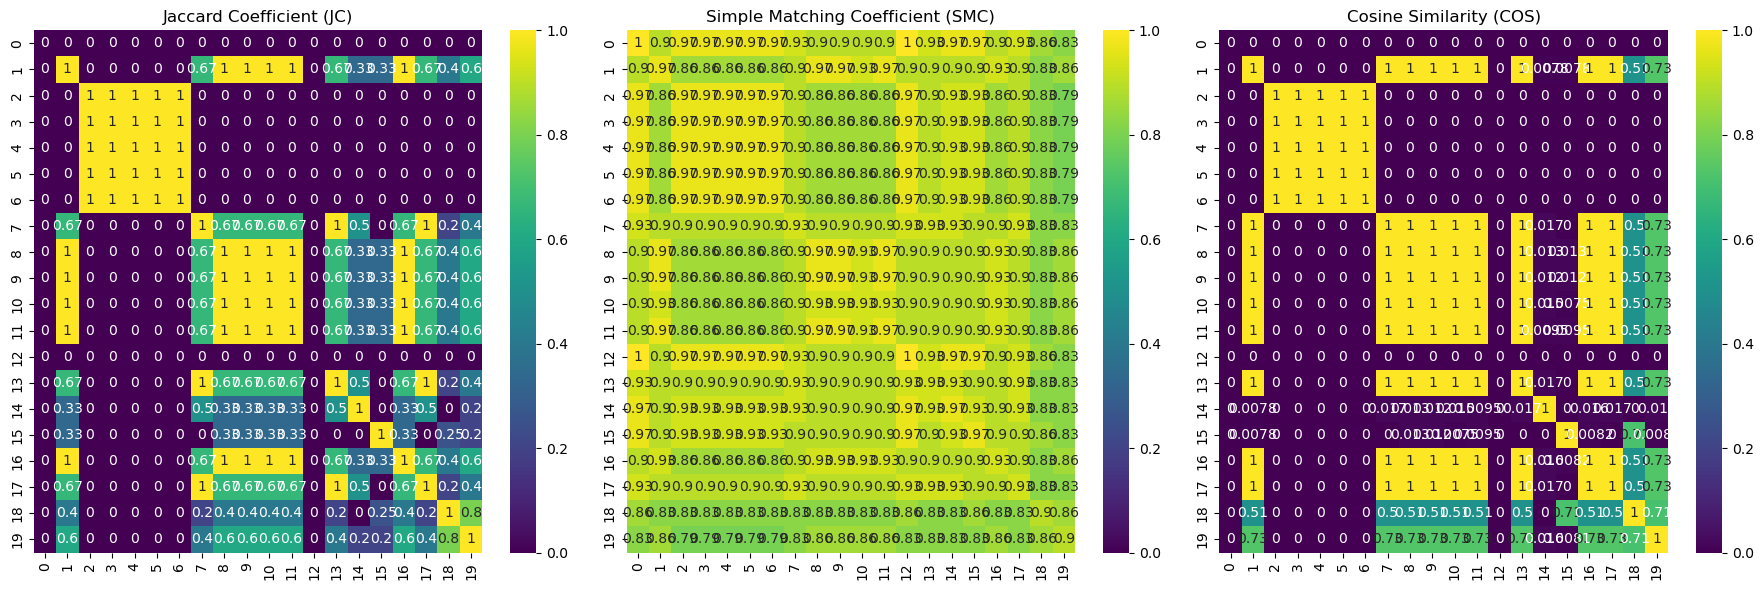

In [85]:
#QUESTION A10

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Jaccard Coefficient
def jc(vec1, vec2):
    intersection = np.logical_and(vec1, vec2).sum()
    union = np.logical_or(vec1, vec2).sum()
    return intersection / union if union != 0 else 0

# Calculate Simple Matching Coefficient
def smc(vec1, vec2):
    matches = np.logical_and(vec1 == vec2, vec1 == 1).sum()
    mismatches = np.logical_and(vec1 == vec2, vec1 == 0).sum()  
    total_comparisons = len(vec1)
    return (matches + mismatches) / total_comparisons

# Calculate Cosine Similarity
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2) if norm_vec1 != 0 and norm_vec2 != 0 else 0

def generate_similarity_matrices(data):
    n = 20  
    jc_matrix = np.zeros((n, n))
    smc_matrix = np.zeros((n, n))
    cos_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            vec1 = data.iloc[i].values
            vec2 = data.iloc[j].values
            jc_matrix[i, j] = jc(vec1, vec2)
            smc_matrix[i, j] = smc(vec1, vec2)
            cos_matrix[i, j] = cosine_similarity(vec1, vec2)

    return jc_matrix, smc_matrix, cos_matrix

def plot_heatmaps(jc_matrix, smc_matrix, cos_matrix):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    sns.heatmap(jc_matrix, annot=True, ax=axes[0], cmap='viridis', vmin=0, vmax=1)
    axes[0].set_title('Jaccard Coefficient (JC)')

    sns.heatmap(smc_matrix, annot=True, ax=axes[1], cmap='viridis', vmin=0, vmax=1)
    axes[1].set_title('Simple Matching Coefficient (SMC)')

    sns.heatmap(cos_matrix, annot=True, ax=axes[2], cmap='viridis', vmin=0, vmax=1)
    axes[2].set_title('Cosine Similarity (COS)')

    plt.tight_layout()
    plt.show()

file_path = 'C:\\Users\\Bhavi\\Downloads\\Lab Session Data.xlsx'
sheet_name = 'thyroid0387_UCI'
thyro_data = pd.read_excel(file_path, sheet_name=sheet_name)

binary_columns = thyro_data.select_dtypes(include=['object']).columns
binary_data = thyro_data[binary_columns].replace({'?': np.nan}).fillna(0)
binary_data = binary_data.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
first_20_data = binary_data.head(20)
jc_matrix, smc_matrix, cos_matrix = generate_similarity_matrices(first_20_data)
plot_heatmaps(jc_matrix, smc_matrix, cos_matrix)
